<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_cluster_groupwise_0_1_0_9_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.020074,198.752786,198.768238,-0.015452
1,0.0,1.0,57.329540,88.266135,33.974483,-0.078591,189.491568,189.586910,-0.095342
2,0.0,2.0,45.215694,22.043105,89.071799,0.408787,166.739385,166.306574,0.432811
3,0.0,3.0,69.375325,71.150993,24.742899,0.180426,175.449643,175.252510,0.197133
4,0.0,4.0,87.837297,47.725671,65.999025,-0.238211,211.323781,211.540749,-0.216968
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.510612,64.251694,32.630612,0.235145,175.628064,175.404181,0.223882
249996,999.0,246.0,39.659377,49.516890,65.602301,0.304739,165.083307,164.796213,0.287094
249997,999.0,247.0,85.998088,89.996742,83.110970,-0.018000,269.087800,269.203261,-0.115461
249998,999.0,248.0,51.290496,77.821258,33.797919,1.729657,174.639329,172.941410,1.697919


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.752786  198.768238 -0.015452
      1.0    57.329540  88.266135  33.974483  ...  189.491568  189.586910 -0.095342
      2.0    45.215694  22.043105  89.071799  ...  166.739385  166.306574  0.432811
      3.0    69.375325  71.150993  24.742899  ...  175.449643  175.252510  0.197133
      4.0    87.837297  47.725671  65.999025  ...  211.323781  211.540749 -0.216968
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  68.510612  64.251694  32.630612  ...  175.628064  175.404181  0.223882
      246.0  39.659377  49.516890  65.602301  ...  165.083307  164.796213  0.287094
      247.0  85.998088  89.996742  83.110970  ...  269.087800  269.203261 -0.115461
      248.0  51.290496  77.821258  33.797919  ...  174.639329  172.941410  1.697919
      249.0  55.580270  50.527439  99.471624  ...  215.517347  215.630573 -0.113226

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.752786  198.768238 -0.015452
      1.0    57.329540  88.266135  33.974483  ...  189.491568  189.586910 -0.095342
      2.0    45.215694  22.043105  89.071799  ...  166.739385  166.306574  0.432811
      3.0    69.375325  71.150993  24.742899  ...  175.449643  175.252510  0.197133
      4.0    87.837297  47.725671  65.999025  ...  211.323781  211.540749 -0.216968
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  68.510612  64.251694  32.630612  ...  175.628064  175.404181  0.223882
      246.0  39.659377  49.516890  65.602301  ...  165.083307  164.796213  0.287094
      247.0  85.998088  89.996742  83.110970  ...  269.087800  269.203261 -0.115461
      248.0  51.290496  77.821258  33.797919  ...  174.639329  172.941410  1.697919
      249.0  55.580270  50.527439  99.471624  ...  215.517347  215.630573 -0.113226

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,61.211187,-0.020074,198.752786,198.768238,-0.015452
1,0.0,1.0,57.329540,88.266135,33.974483,-0.078591,189.491568,189.586910,-0.095342
2,0.0,2.0,45.215694,22.043105,89.071799,0.408787,166.739385,166.306574,0.432811
3,0.0,3.0,69.375325,71.150993,24.742899,0.180426,175.449643,175.252510,0.197133
4,0.0,4.0,87.837297,47.725671,65.999025,-0.238211,211.323781,211.540749,-0.216968
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,68.510612,64.251694,32.630612,0.235145,175.628064,175.404181,0.223882
249996,999.0,246.0,39.659377,49.516890,65.602301,0.304739,165.083307,164.796213,0.287094
249997,999.0,247.0,85.998088,89.996742,83.110970,-0.018000,269.087800,269.203261,-0.115461
249998,999.0,248.0,51.290496,77.821258,33.797919,1.729657,174.639329,172.941410,1.697919


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.854520  58.707153  61.211187  ...  198.752786  198.768238 -0.015452
      1.0    57.329540  88.266135  33.974483  ...  189.491568  189.586910 -0.095342
      2.0    45.215694  22.043105  89.071799  ...  166.739385  166.306574  0.432811
      3.0    69.375325  71.150993  24.742899  ...  175.449643  175.252510  0.197133
      4.0    87.837297  47.725671  65.999025  ...  211.323781  211.540749 -0.216968
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  68.510612  64.251694  32.630612  ...  175.628064  175.404181  0.223882
      246.0  39.659377  49.516890  65.602301  ...  165.083307  164.796213  0.287094
      247.0  85.998088  89.996742  83.110970  ...  269.087800  269.203261 -0.115461
      248.0  51.290496  77.821258  33.797919  ...  174.639329  172.941410  1.697919
      249.0  55.580270  50.527439  99.471624  ...  215.517347  215.630573 -0.113226

[250000 rows x 7 columns]

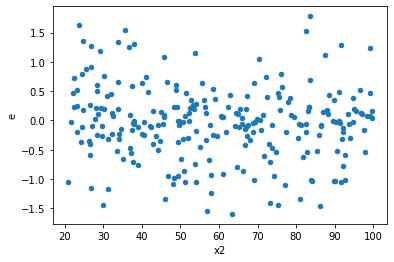

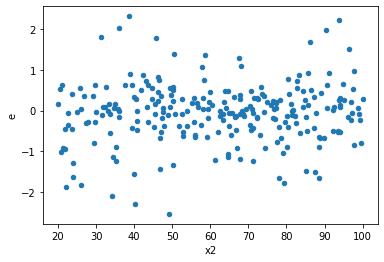

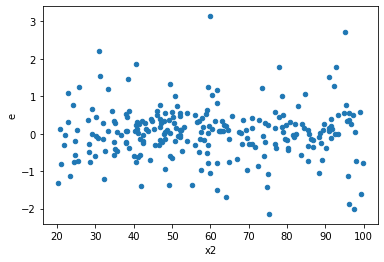

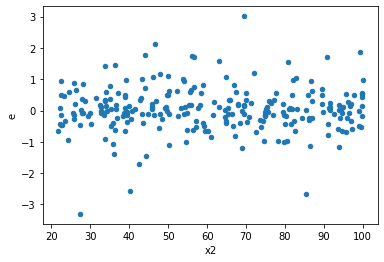

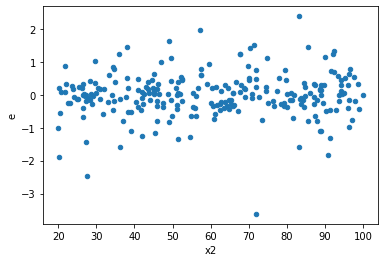

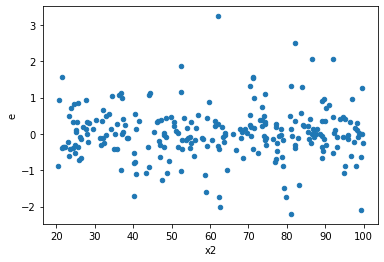

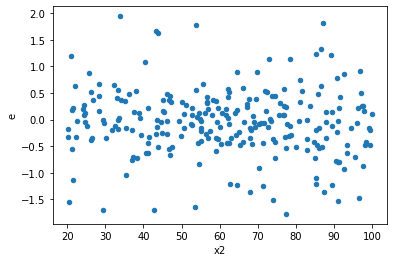

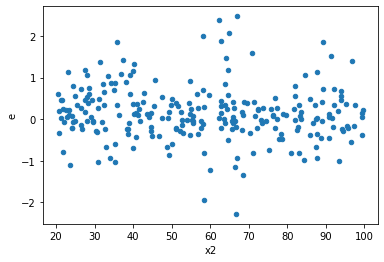

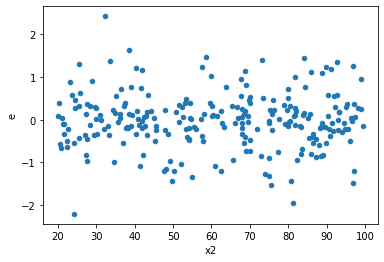

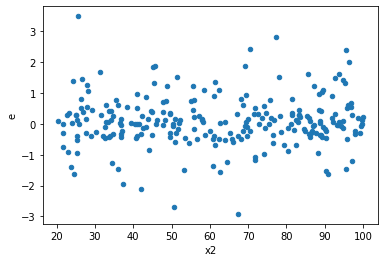

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
1.0,128.0,116.0,59.07653003358988,74.98385710713775,0.4651695278235424,0.6520335400620674,1.4005698675144584,0.06314911687799452,0.9684254415610027,Reject005=1 : Homoscedasticity
2.0,104.0,140.0,46.725417140285245,63.93615250322245,0.4536448266047111,0.459972320167068,1.0164794769242043,0.9362009937637112,0.5318995031181444,Reject005=1 : Homoscedasticity
5.0,125.0,119.0,56.38561780835285,64.02417802590014,0.45472272426091004,0.5425777798805097,1.1927205989107648,0.330765079270404,0.834617460364798,Reject005=1 : Homoscedasticity
7.0,106.0,138.0,40.33632264615344,79.59479903322588,0.3841554537728899,0.580983934549094,1.5157066888903503,0.025344235498196976,0.9873278822509015,Reject005=0 : Heteroscedasticity
11.0,132.0,112.0,69.00364912926977,61.96071027653654,0.5267454132005326,0.5582045970859147,1.058279145340771,0.7517559384531336,0.6241220307734332,Reject005=1 : Homoscedasticity
13.0,117.0,127.0,55.13797748373576,70.19250076281868,0.47532739210117037,0.5570833393874498,1.1727947804739813,0.38221424562380557,0.8088928771880972,Reject005=1 : Homoscedasticity
16.0,119.0,125.0,45.09514869844819,48.646909439920506,0.38216227710549316,0.39231378580581056,1.0269809308423012,0.8845669440826209,0.5577165279586895,Reject005=1 : Homoscedasticity
18.0,132.0,112.0,55.66490569181854,48.68900018957786,0.42492294421235527,0.4386396413475483,1.0308732907379987,0.8633967863552894,0.5683016068223553,Reject005=1 : Homoscedasticity
22.0,123.0,121.0,50.55529582405943,79.22242622222987,0.4143876706890117,0.6601868851852489,1.592946624087492,0.010569902840951606,0.9947150485795242,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,125.0,119.0,69.76216861699717,60.003569026615224,0.5625981340080417,0.508504822259451,0.9034833680071974,0.5772653975713588,Reject005=1 : Homoscedasticity
1.0,128.0,116.0,59.07653003358988,74.98385710713775,0.4651695278235424,0.6520335400620674,1.4005698675144584,0.06314911687799452,Reject005=1 : Homoscedasticity
2.0,104.0,140.0,46.725417140285245,63.93615250322245,0.4536448266047111,0.459972320167068,1.0164794769242043,1.0637990062362888,Reject005=1 : Homoscedasticity
3.0,120.0,124.0,64.59290709035261,53.01189758677494,0.5427975385743917,0.4309910372908532,0.7942332786251173,0.20411344915090898,Reject005=1 : Homoscedasticity
4.0,104.0,140.0,44.41642994585147,57.7266281361977,0.4312274752024414,0.41529948299422803,0.9654679157309861,0.8409058067477928,Reject005=1 : Homoscedasticity
5.0,125.0,119.0,56.38561780835285,64.02417802590014,0.45472272426091004,0.5425777798805097,1.1927205989107648,0.330765079270404,Reject005=1 : Homoscedasticity
6.0,119.0,125.0,56.727481075572584,55.14531181933948,0.4807413650472253,0.44472025660757647,0.9254480519251804,0.6683267039707489,Reject005=1 : Homoscedasticity
7.0,106.0,138.0,40.33632264615344,79.59479903322588,0.3841554537728899,0.580983934549094,1.5157066888903503,0.025344235498196976,Reject005=0 : Heteroscedasticity
8.0,103.0,141.0,51.14285266225106,61.107570548099126,0.501400516296579,0.4364826467721366,0.8728270182085898,0.45184069845112085,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      828
Reject005=0 : Heteroscedasticity    172
Name: Result_test, dtype: int64